# Visualizacion de Datos

In [19]:
#importar librerias

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

Exploracion de Data

In [20]:
#impotar data
df = pd.read_csv('titanic.csv')

In [21]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [22]:
#validar tipo de df
type(df)

pandas.core.frame.DataFrame

In [23]:
#mostrar la forma del DataFrame (filas, columnas)
df.shape

(891, 12)

In [24]:
#mostrar los nombres de las columnas
df.columns 

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [25]:
#mostrar estadísticas descriptivas de las columnas numéricas
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [26]:
#mostrar información general del DataFrame, incluyendo tipos de datos y valores nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [27]:
#validar si hay valores nulos en el DataFrame
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Ejercicio 1: Distribución de Pasajeros por Clase
Enunciado: Crear un gráfico de barras que muestre el número de pasajeros en cada clase (Pclass).
Función recomendada: seaborn.countplot()

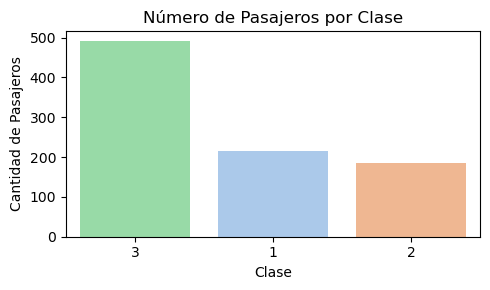

,Clase,Pasajeros por Clase
0,3,491
1,1,216
2,2,184


In [28]:
#obtener el orden de las clases de pasajeros
order = df['Pclass'].value_counts().index

#Crear grafico de barras
plt.figure(figsize=(5, 3))
sns.countplot(data=df, x="Pclass", hue="Pclass", palette="pastel", legend=False, order=order)

#Personalizar el gráfico
plt.title("Número de Pasajeros por Clase")
plt.xlabel("Clase")
plt.ylabel("Cantidad de Pasajeros")
plt.tight_layout()
plt.show()

#Confirmar información de la clase
clase_df = df['Pclass'].value_counts().reset_index()
clase_df.columns = ['Clase', 'Pasajeros por Clase']
clase_df




Ejercicio 2: Tasa de Supervivencia General
Enunciado: Visualizar la proporción de pasajeros que sobrevivieron y los que no.
Función recomendada: matplotlib.pyplot.pie() o seaborn.countplot()

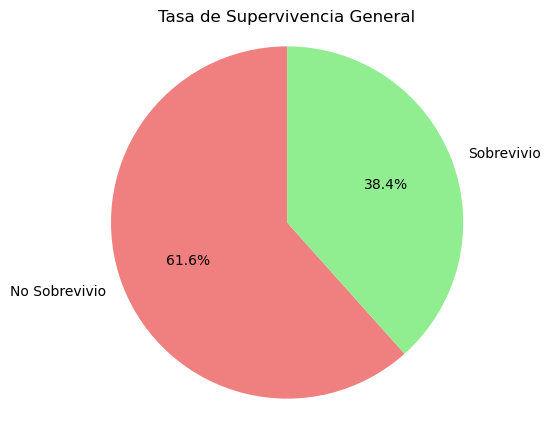

Survived
0    549
1    342
Name: count, dtype: int64

In [29]:
# Contar sobrevivientes y no sobrevivientes
supervivencia = df['Survived'].value_counts()

# Etiquetas
etiquetas = ['No Sobrevivio', 'Sobrevivio']

# Colores
colores = ['lightcoral', 'lightgreen']

# Crear gráfico de torta
plt.figure(figsize=(5, 5))
plt.pie(supervivencia, labels=etiquetas, autopct='%1.1f%%', colors=colores, startangle=90)
plt.title("Tasa de Supervivencia General")
plt.axis('equal')  # segun esto es para que el gráfico sea un círculo \\ No se deform
plt.show()

#mostrar cantida de sobrevivientes y no sobrevivientes
supervivencia



Ejercicio 3: Distribución de Edades de los Pasajeros
Enunciado: Entender la distribución de las edades de los pasajeros a bordo.
Función recomendada: seaborn.histplot()

In [30]:
#confirmar que hay valores nulos en la columna 'Age'
df['Age'].isnull().sum()


177

Text(0, 0.5, 'Cantidad')

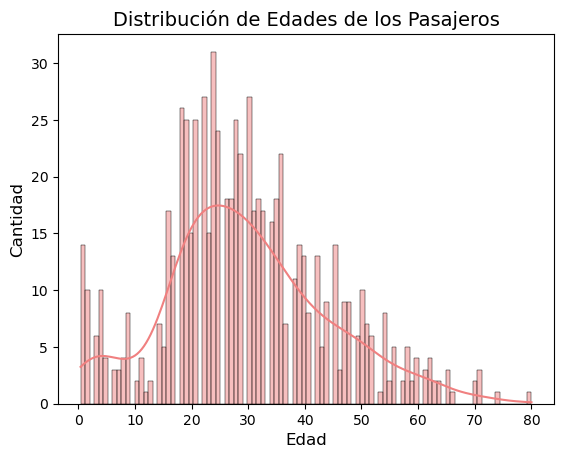

In [69]:
#lo que se pide es una visualizacion representativa entonces el valor que se le dara a los nulos sera eliminarlos ya que no se necesita hacer algun modelado

#se grafica sin tener en cuenta los nulos
sns.histplot(data=df[df["Age"].notnull()], x="Age", bins=100, kde=True, color='lightcoral')

# Títulos y etiquetas
plt.title("Distribución de Edades de los Pasajeros", fontsize=14)
plt.xlabel("Edad", fontsize=12)
plt.ylabel("Cantidad", fontsize=12)


Ejercicio 4: Tasa de Supervivencia por Género
Enunciado: Comparar la tasa de supervivencia entre hombres y mujeres.
Función recomendada: seaborn.countplot() (usando el argumento hue)

In [45]:
#confirmar que hay valores nulos en la columna 'Sex'
df['Sex'].isnull().sum()

#no hay que hacer tratamientiento de nulos

0

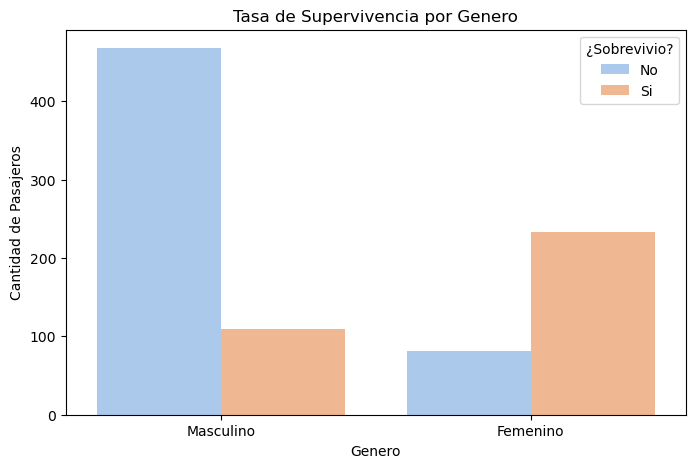

Sex
female    74.203822
male      18.890815
Name: Survived, dtype: float64

In [44]:
#cambiar generos a español
df_genero = df.copy() #se copia el priginal para no modificarlo
df_genero['Sex'] = df_genero['Sex'].replace({'male': 'Masculino', 'female': 'Femenino'})

plt.figure(figsize=(8, 5))
sns.countplot(data=df_genero, x='Sex', hue='Survived', palette='pastel')
plt.title('Tasa de Supervivencia por Genero')
plt.xlabel('Genero')
plt.ylabel('Cantidad de Pasajeros')
plt.legend(title='¿Sobrevivio?', labels=['No', 'Si'])
plt.show()


tasa_supervivencia = df.groupby('Sex')['Survived'].mean() * 100
tasa_supervivencia


Ejercicio 5: Supervivencia por Clase y Género
Enunciado: Analizar cómo la clase social y el género influyeron conjuntamente en la supervivencia.
Función recomendada: seaborn.catplot() (con kind='bar')

In [46]:
#confirmar que hay valores nulos en la columna 'Sex'
df['Sex'].isnull().sum()

0

In [49]:
#confirmar que hay valores nulos en la columna 'Pclass'
df['Pclass'].isnull().sum()

#no hay que hacer tratamientiento de nulos

0

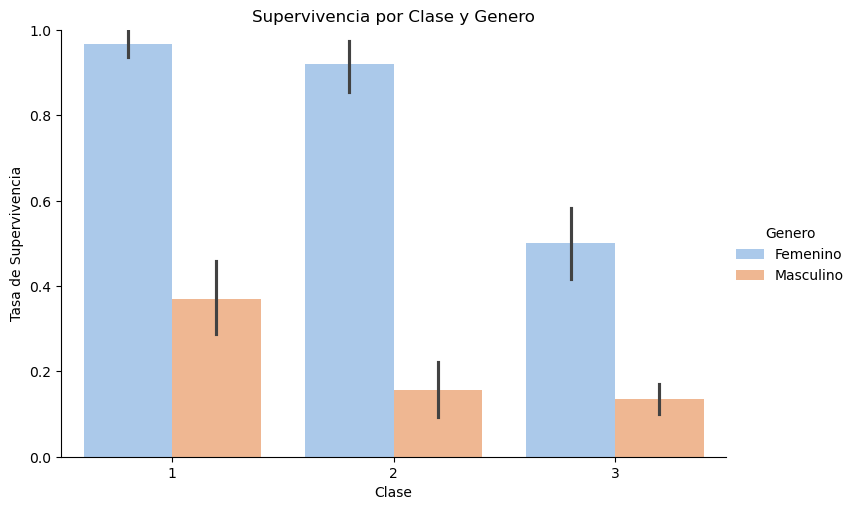

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

df_genero.rename(columns={'Sex': 'Genero'}, inplace=True)  # cambiar nombre a columna para que salga en español

grafico = sns.catplot(
    data=df_genero,     
    x='Pclass',           
    y='Survived',         # Altura
    hue='Genero',         # Separacion
    kind='bar',           # Tipo de grafico
    palette='pastel',     
    height=5,             
    aspect=1.5         
)

# Personalización del gráfico
plt.title('Supervivencia por Clase y Genero')     
plt.xlabel('Clase')                              
plt.ylabel('Tasa de Supervivencia')               
plt.ylim(0, 1)                                                         
plt.show()


Ejercicio 6: Distribución de Tarifas Pagadas por los Pasajeros
Enunciado: Explorar la distribución de las tarifas (Fare) pagadas.
Función recomendada: seaborn.boxplot()

Ejercicio 7: Relación entre Edad, Tarifa y Supervivencia
Enunciado: Investigar la relación entre la edad, la tarifa pagada y la supervivencia.
Función recomendada: seaborn.scatterplot()

Ejercicio 8: Supervivencia por Puerto de Embarque
Enunciado: Determinar si el puerto de embarque (Embarked) tuvo relación con la supervivencia.
Función recomendada: seaborn.catplot() (con kind='bar')

Ejercicio 9: Tamaño de la Familia y Supervivencia
Enunciado: Analizar si viajar solo o con familia afectó las posibilidades de supervivencia.
Función recomendada: seaborn.lineplot() o seaborn.barplot()

Ejercicio 10: Correlación entre Variables Numéricas
Enunciado: Visualizar las correlaciones entre todas las variables numéricas del dataset.
Función recomendada: seaborn.heatmap()